In [1]:
import pandas as pd
import numpy as np

In [2]:
# import tensorflow as tf
# import transformers
# from transformers import BertTokenizer, TFBertModel

In [3]:
data = pd.concat([
  pd.read_csv("/kaggle/input/60k-stack-overflow-questions-with-quality-rate/train.csv"), 
  pd.read_csv("/kaggle/input/60k-stack-overflow-questions-with-quality-rate/valid.csv")
])

data.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ


In [4]:
data["Title"] = data['Title'].str.replace(r'<[^<>]*>', '', regex=True)
data['Body'] = data['Body'].str.replace(r'<[^<>]*>', '', regex=True)

data['Text'] = data['Title'] + " " + data['Body']
# data['Text'] = data['Text'].str.replace(r'<[^<>]*>', '', regex=True)

# df = df.drop(columns=['Title', 'Body'])
data.head()

,Id,Title,Body,Tags,CreationDate,Y,Text
0,34552656,Java: Repeat Task Every Random Seconds,I'm already familiar with repeating tasks ever...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE,Java: Repeat Task Every Random Seconds I'm alr...
1,34553034,Why are Java Optionals immutable?,I'd like to understand why Java 8 Optionals we...,<java><optional>,2016-01-01 02:03:20,HQ,Why are Java Optionals immutable? I'd like to ...
2,34553174,Text Overlay Image with Darkened Opacity React...,I am attempting to overlay a title over an ima...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ,Text Overlay Image with Darkened Opacity React...
3,34553318,Why ternary operator in swift is so picky?,"The question is very simple, but I just could ...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ,Why ternary operator in swift is so picky? The...
4,34553755,hide/show fab with scale animation,I'm using custom floatingactionmenu. I need to...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ,hide/show fab with scale animation I'm using c...


# Prepocessing

In [5]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
targets = {'HQ': 0, 'LQ_EDIT': 1, 'LQ_CLOSE': 2}
data['Y'] = data['Y'].map(targets)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data["Text"], data["Y"], test_size=0.3, random_state=42, stratify=data["Y"])

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [8]:
y_train.value_counts()

Y
2    14000
0    14000
1    14000
Name: count, dtype: int64

In [9]:
y_test.value_counts()

Y
1    6000
0    6000
2    6000
Name: count, dtype: int64

In [10]:
%pip install -U "tensorflow-text==2.13.*"
%pip install "tf-models-official==2.13.*"

Note: you may need to restart the kernel to use updated packages.
  Obtaining dependency information for tf-models-official==2.13.* from https://files.pythonhosted.org/packages/d8/c3/4511e49412492966f4e6e0a20b41ae66d027e5a76e8c2b436b591ecc4273/tf_models_official-2.13.2-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 2.1 MB/s eta 0:00:00
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/77/d8/69b89c358609ef1853d860bcf59472abe65e2c434767e6e91c57e12e5c23/immutabledict-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/ba/64/0451cf41a00fd5ac4501de4ea0e395b7d909e09d665e56890b5d3809ae26/pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for sacrebleu from https://files.pythonhosted.org/packages/df/c0/ff53cb76c1b050ad25d056877ba6d3f6fa964134370c4ccf57ad933d6f72

# Training

In [11]:
import tensorflow as tf
import transformers
from transformers import BertTokenizer, TFBertModel

In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [13]:
def build_model(transformer, lstm_units=64, loss='categorical_crossentropy', max_len=512):
    input_word_ids = tf.keras.layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = tf.expand_dims(sequence_output[:, 0, :], axis=1)

    # Adding a dropout layer
    x = tf.keras.layers.Dropout(0.40)(cls_token)

    # Adding an LSTM layer
    lstm_out = tf.keras.layers.LSTM(lstm_units)(x)

    # Dense layer with softmax activation for classification
    out = tf.keras.layers.Dense(3, activation='softmax')(lstm_out)

    model = tf.keras.Model(inputs=input_word_ids, outputs=out)

    # Compiling the model
    model.compile(tf.keras.optimizers.Adam(learning_rate=3e-5), loss=loss, metrics=['accuracy'])
    
    return model

In [14]:
def regular_encode(texts, tokenizer, maxlen = 512):
    enc_di = tokenizer.batch_encode_plus(
        texts,
        truncation=True,
        padding='max_length',
        max_length=maxlen,
        return_attention_mask=True,
        return_token_type_ids=False
    )
    return np.array(enc_di['input_ids'])

In [15]:
Xtrain_encoded = regular_encode(X_train.astype('str'), tokenizer, maxlen = 128)
Xtest_encoded = regular_encode(X_test.astype('str'), tokenizer, maxlen = 128)
ytrain_encoded = tf.keras.utils.to_categorical(y_train, num_classes = 3, dtype = 'int32')
ytest_encoded = tf.keras.utils.to_categorical(y_test, num_classes = 3, dtype = 'int32')

In [16]:
BATCH_SIZE = 32
AUTO = tf.data.experimental.AUTOTUNE 
train_dataset = (tf.data.Dataset.from_tensor_slices((Xtrain_encoded, ytrain_encoded)).repeat().shuffle(2048).batch(BATCH_SIZE).prefetch(AUTO))
test_dataset = (tf.data.Dataset.from_tensor_slices(Xtest_encoded).batch(BATCH_SIZE))

In [17]:
transformer_layer = transformers.TFAutoModel.from_pretrained('bert-base-uncased')
model = build_model(transformer_layer, max_len=128)
model.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer  [(None, 128)]             0         
 )                                                               
                                                                 
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPo   109482240 
 el)                         olingAndCrossAttentions             
                             (last_hidden_state=(Non             
                             e, 128, 768),                       
                              pooler_output=(None, 7             
                             68),                                
                              past_key_values=None,              
                             hidden_states=None, att             
                             entions=None, cross_att             
                             entions=None)                   

In [18]:
n_steps = Xtrain_encoded.shape[0] // BATCH_SIZE
train_history = model.fit(train_dataset, steps_per_epoch = n_steps, epochs = 20)

Epoch 1/20
1312/1312 [==============================] - 1105s 802ms/step - loss: 0.6249 - accuracy: 0.7197
Epoch 2/20
1312/1312 [==============================] - 1052s 802ms/step - loss: 0.4522 - accuracy: 0.8081
Epoch 3/20
1312/1312 [==============================] - 1052s 802ms/step - loss: 0.3274 - accuracy: 0.8667
Epoch 4/20
1312/1312 [==============================] - 1053s 802ms/step - loss: 0.2212 - accuracy: 0.9152
Epoch 5/20
1312/1312 [==============================] - 1052s 802ms/step - loss: 0.1364 - accuracy: 0.9526
Epoch 6/20
1312/1312 [==============================] - 1052s 802ms/step - loss: 0.0986 - accuracy: 0.9671
Epoch 7/20
1312/1312 [==============================] - 1052s 802ms/step - loss: 0.0717 - accuracy: 0.9769
Epoch 8/20
1312/1312 [==============================] - 1052s 802ms/step - loss: 0.0640 - accuracy: 0.9795
Epoch 9/20
1312/1312 [==============================] - 1052s 802ms/step - loss: 0.0493 - accuracy: 0.9844
Epoch 10/20
1312/1312 [==============

In [19]:
preds = model.predict(test_dataset, verbose = 1)

#converting the one hot vector output to a linear numpy array.
pred_classes = np.argmax(preds, axis = 1)

563/563 [==============================] - 156s 270ms/step


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
accuracy = accuracy_score(y_test, pred_classes)

precision = precision_score(y_test, pred_classes, average='weighted')

recall = recall_score(y_test, pred_classes, average='weighted')

f1 = f1_score(y_test, pred_classes, average='weighted')

# Print the metrics
print('Accuracy : {:.2f}%'.format(100 * accuracy))
print('Precision: {:.2f}%'.format(100 * precision))
print('Recall: {:.2f}%'.format(100 * recall))
print('F1 Score: {:.2f}%'.format(100 * f1))

Accuracy : 77.17%
Precision: 76.92%
Recall: 77.17%
F1 Score: 76.96%


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

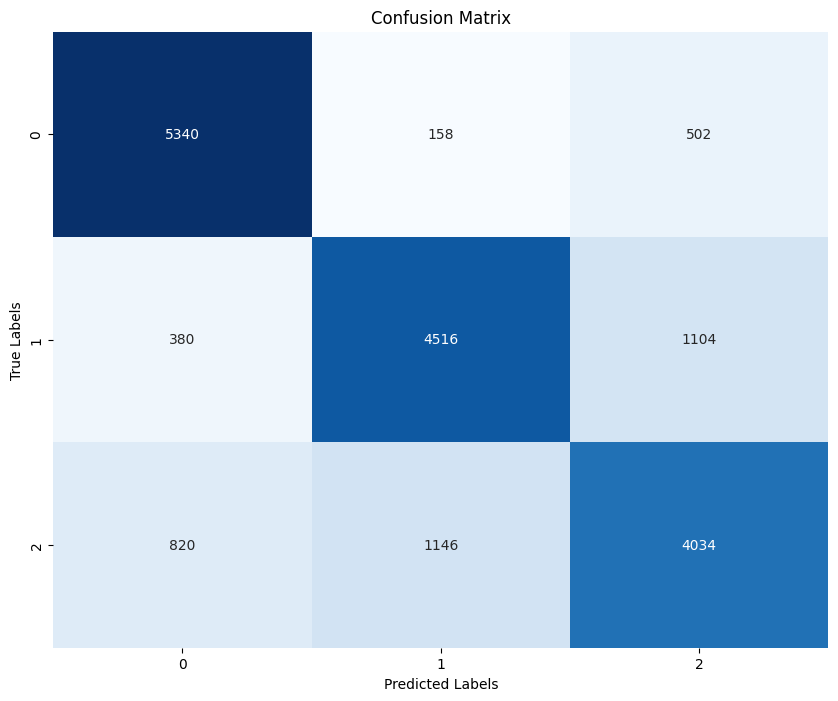

In [23]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
model.save('StackOverflowQuestionClassification')